In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#그래프에서 한글 출력 시 폰트 변경(기본폰트: sans-serif)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프에서 마이너스(-) 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
sns.set(style="darkgrid")

# 데이터 불러오기 & 필요한 데이터 Filter

In [101]:
exercise_df = pd.read_excel('./운동.xlsx') 
print(exercise_df)

      Sample_ID  Chol_1  GLU0_1  Waist_1  TG_1  Fat_1  FatPercentage_1  \
0         S0001     NaN      91     80.9    81    9.5             15.0   
1         S0002     NaN     140     95.4   106   21.0             29.5   
2         S0003     NaN      83     88.4   231   24.1             39.1   
3         S0004     NaN      94     75.5    94   15.3             29.1   
4         S0005     NaN      89     70.5    70   13.5             24.6   
..          ...     ...     ...      ...   ...    ...              ...   
386  MetS_S0280   201.0     101     75.0    51   20.6             34.4   
387  MetS_S0281   173.0     103     90.0   104   33.0             43.8   
388  MetS_S0282   149.0     150     91.0   128   29.4             35.8   
389  MetS_S0283   234.0     121     85.0   163   20.3             26.8   
390  MetS_S0284   212.0     107     76.0    90   18.8             32.6   

    Insulin_1  HDL_1  LDL_1  Chol_2  GLU0_2  Waist_2   TG_2  Fat_2  \
0         7.7     61    111     NaN    98

In [102]:
exercise_df.dropna(subset =['HDL_1','HDL_2','LDL_1','LDL_2','Waist_1','Waist_2','TG_1','TG_2'], inplace=True)

In [103]:
exercise_df.isnull().sum()

Sample_ID           0
Chol_1             46
GLU0_1              0
Waist_1             0
TG_1                0
Fat_1               0
FatPercentage_1     0
Insulin_1           0
HDL_1               0
LDL_1               0
Chol_2             46
GLU0_2              0
Waist_2             0
TG_2                0
Fat_2               0
FatPercentage_2     0
Insulin_2           0
HDL_2               0
LDL_2               0
dtype: int64

In [104]:
exercise_df

,Sample_ID,Chol_1,GLU0_1,Waist_1,TG_1,Fat_1,FatPercentage_1,Insulin_1,HDL_1,LDL_1,Chol_2,GLU0_2,Waist_2,TG_2,Fat_2,FatPercentage_2,Insulin_2,HDL_2,LDL_2
0,S0001,NaN,91,80.9,81,9.5,15.00,7.7,61,111,NaN,98.0,83.0,75.0,9.7,15.9,4.1,77.0,112.0
1,S0002,NaN,140,95.4,106,21.0,29.50,5.4,60,77,NaN,130.0,90.5,101.0,19.9,27.9,5.3,59.0,77.0
2,S0003,NaN,83,88.4,231,24.1,39.10,5.1,40,155,NaN,88.0,86.5,183.0,22.6,36.7,7.4,40.0,128.0
3,S0004,NaN,94,75.5,94,15.3,29.10,4.2,58,145,NaN,100.0,77.0,78.0,16.0,30.9,5.9,54.0,119.0
4,S0005,NaN,89,70.5,70,13.5,24.60,3.2,81,123,NaN,90.0,66.5,42.0,14.9,26.8,4.3,72.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,MetS_S0217,140.0,96,99.0,64,30.2,40.30,4.2,55,65,141.0,93.0,98.0,46.0,27.3,39.3,1.8,66.0,56.0
324,MetS_S0218,124.0,94,101.0,62,27.3,30.44,8.8,51,57,134.0,106.0,97.5,76.0,22.1,25.7,20.4,51.0,66.0
326,MetS_S0220,170.0,87,84.0,88,18.8,31.00,6.3,58,94,147.0,91.0,80.5,91.0,17.5,29.9,5.1,49.0,83.0
328,MetS_S0222,137.0,93,75.6,65,14.5,27.30,4.8,58,52,134.0,99.0,79.0,62.0,15.3,29.0,9.3,60.0,53.0


# TC 데이터 추가

In [105]:
#TC = HDL-C + LDL-C + TG/5

tc_1_list=[]
tc_2_list=[]

for index, row in exercise_df.iterrows():

    tc_1=int(row[8])+int(row[9])+int(row[4])/5
    tc_1_list.append(tc_1)

    tc_2=int(row[17])+int(row[18])+int(row[13])/5
    tc_2_list.append(tc_2)

print(len(tc_1_list),len(tc_2_list))

320 320


In [107]:
TC_df=pd.DataFrame({'TC_1':tc_1_list,'TC_2':tc_2_list})

exercise_df=pd.concat([exercise_df, TC_df], axis=1)

exercise_df

,Sample_ID,Chol_1,GLU0_1,Waist_1,TG_1,Fat_1,FatPercentage_1,Insulin_1,HDL_1,LDL_1,...,GLU0_2,Waist_2,TG_2,Fat_2,FatPercentage_2,Insulin_2,HDL_2,LDL_2,TC_1,TC_2
0,S0001,NaN,91.0,80.9,81.0,9.5,15.00,7.7,61.0,111.0,...,98.0,83.0,75.0,9.7,15.9,4.1,77.0,112.0,188.2,204.0
1,S0002,NaN,140.0,95.4,106.0,21.0,29.50,5.4,60.0,77.0,...,130.0,90.5,101.0,19.9,27.9,5.3,59.0,77.0,158.2,156.2
2,S0003,NaN,83.0,88.4,231.0,24.1,39.10,5.1,40.0,155.0,...,88.0,86.5,183.0,22.6,36.7,7.4,40.0,128.0,241.2,204.6
3,S0004,NaN,94.0,75.5,94.0,15.3,29.10,4.2,58.0,145.0,...,100.0,77.0,78.0,16.0,30.9,5.9,54.0,119.0,221.8,188.6
4,S0005,NaN,89.0,70.5,70.0,13.5,24.60,3.2,81.0,123.0,...,90.0,66.5,42.0,14.9,26.8,4.3,72.0,114.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,MetS_S0217,140.0,96.0,99.0,64.0,30.2,40.30,4.2,55.0,65.0,...,93.0,98.0,46.0,27.3,39.3,1.8,66.0,56.0,NaN,NaN
324,MetS_S0218,124.0,94.0,101.0,62.0,27.3,30.44,8.8,51.0,57.0,...,106.0,97.5,76.0,22.1,25.7,20.4,51.0,66.0,NaN,NaN
326,MetS_S0220,170.0,87.0,84.0,88.0,18.8,31.00,6.3,58.0,94.0,...,91.0,80.5,91.0,17.5,29.9,5.1,49.0,83.0,NaN,NaN
328,MetS_S0222,137.0,93.0,75.6,65.0,14.5,27.30,4.8,58.0,52.0,...,99.0,79.0,62.0,15.3,29.0,9.3,60.0,53.0,NaN,NaN


In [108]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 329
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        320 non-null    object 
 1   Chol_1           274 non-null    float64
 2   GLU0_1           320 non-null    float64
 3   Waist_1          320 non-null    float64
 4   TG_1             320 non-null    float64
 5   Fat_1            320 non-null    float64
 6   FatPercentage_1  320 non-null    float64
 7   Insulin_1        320 non-null    object 
 8   HDL_1            320 non-null    float64
 9   LDL_1            320 non-null    float64
 10  Chol_2           274 non-null    float64
 11  GLU0_2           320 non-null    float64
 12  Waist_2          320 non-null    float64
 13  TG_2             320 non-null    float64
 14  Fat_2            320 non-null    float64
 15  FatPercentage_2  320 non-null    float64
 16  Insulin_2        320 non-null    float64
 17  HDL_2           

In [114]:
exercise_df.dropna(subset =['HDL_1','HDL_2','LDL_1','LDL_2','Waist_1','Waist_2','TG_1','TG_2','TC_1','TC_2'], inplace=True)

In [115]:
exercise_df.isnull().sum()

Sample_ID           0
Chol_1             46
GLU0_1              0
Waist_1             0
TG_1                0
Fat_1               0
FatPercentage_1     0
Insulin_1           0
HDL_1               0
LDL_1               0
Chol_2             46
GLU0_2              0
Waist_2             0
TG_2                0
Fat_2               0
FatPercentage_2     0
Insulin_2           0
HDL_2               0
LDL_2               0
TC_1                0
TC_2                0
dtype: int64

# 운동 실시에 따른 혈중 지질 농도(HDL, LDL, TC, TG, Waist)

In [116]:
#8주간 운동을 실시한 집단의 혈중 지질 차이 pd 생성
exercise_pd = {
    'Sample_ID' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'TC' : [],
    'Waist' : []
}

exercise_pd = pd.DataFrame(exercise_pd)

In [117]:
#exercise_pd 생성
for index, row in exercise_df.iterrows():

    HDL=int(row[17])-int(row[8])
    TG=int(row[13])-int(row[4])
    LDL=int(row[18])-int(row[9])
    TC=int(row[20])-int(row[19])
    Waist=int(row[12])-int(row[3])
    
    #데이터 추가
    exercise_pd.loc[len(exercise_pd)] = [row[0],HDL,TG,LDL,TC,Waist]
    
exercise_pd

,Sample_ID,HDL,TG,LDL,TC,Waist
0,S0001,16.0,-6.0,1.0,16.0,3.0
1,S0002,-1.0,-5.0,0.0,-2.0,-5.0
2,S0003,0.0,-48.0,-27.0,-37.0,-2.0
3,S0004,-4.0,-16.0,-26.0,-33.0,2.0
4,S0005,-9.0,-28.0,-9.0,-24.0,-4.0
...,...,...,...,...,...,...
307,MetS_S0207,1.0,-10.0,45.0,26.0,-2.0
308,MetS_S0208,1.0,19.0,45.0,-6.0,-9.0
309,MetS_S0209,-8.0,-4.0,-6.0,-1.0,9.0
310,MetS_S0211,-2.0,14.0,-1.0,-19.0,-4.0


In [121]:
#exercise_pd의 혈중 지질 농도 평균 변화
exercise_pd_tg_mean = exercise_pd['TG'].mean()
exercise_pd_ldl_mean = exercise_pd['LDL'].mean()
exercise_pd_hdl_mean = exercise_pd['HDL'].mean()
exercise_pd_tc_mean = exercise_pd['TC'].mean()
exercise_pd_waist_mean = exercise_pd['Waist'].mean()


print(f'8주간 운동 후 TG 평균 감소: {exercise_pd_tg_mean}')
print(f'8주간 운동 후 LDL 평균 감소: {exercise_pd_ldl_mean}')
print(f'8주간 운동 후 HDL 평균 감소: {exercise_pd_hdl_mean}')
print(f'8주간 운동 후 TC 평균 감소: {exercise_pd_tc_mean}')
print(f'8주간 운동 후 Waist 평균 감소: {exercise_pd_waist_mean}')

8주간 운동 후 TG 평균 감소: -3.9583333333333335
8주간 운동 후 LDL 평균 감소: -4.855769230769231
8주간 운동 후 HDL 평균 감소: -1.4166666666666667
8주간 운동 후 TC 평균 감소: -7.176282051282051
8주간 운동 후 Waist 평균 감소: -0.48717948717948717


# 논문 내용 % 감소 비율 실제 확인

In [123]:
#1차 방문 (8주간 운동 전 평균)
exercise_df_tg_1mean = exercise_df['TG_1'].mean()
exercise_df_ldl_1mean = exercise_df['LDL_1'].mean()
exercise_df_hdl_1mean = exercise_df['HDL_1'].mean()
exercise_df_tc_1mean = exercise_df['TC_1'].mean()
exercise_df_waist_1mean = exercise_df['Waist_1'].mean()

print(f'8주간 운동 전 TG 평균: {exercise_df_tg_1mean}')
print(f'8주간 운동 전 LDL 평균: {exercise_df_ldl_1mean}')
print(f'8주간 운동 전 HDL 평균: {exercise_df_hdl_1mean}')
print(f'8주간 운동 전 TC 평균: {exercise_df_tc_1mean}')
print(f'8주간 운동 전 Waist 평균: {exercise_df_waist_1mean}')

8주간 운동 전 TG 평균: 114.17948717948718
8주간 운동 전 LDL 평균: 113.68910256410257
8주간 운동 전 HDL 평균: 60.13461538461539
8주간 운동 전 TC 평균: 196.5102564102563
8주간 운동 전 Waist 평균: 82.45884615384614


In [124]:
#2차 방문 (8주간 운동 후 평균)
exercise_df_tg_2mean = exercise_df['TG_2'].mean()
exercise_df_ldl_2mean = exercise_df['LDL_2'].mean()
exercise_df_hdl_2mean = exercise_df['HDL_2'].mean()
exercise_df_tc_2mean = exercise_df['TC_2'].mean()
exercise_df_waist_2mean = exercise_df['Waist_2'].mean()

print(f'8주간 운동 후 TG 평균: {exercise_df_tg_2mean}')
print(f'8주간 운동 후 LDL 평균: {exercise_df_ldl_2mean}')
print(f'8주간 운동 후 HDL 평균: {exercise_df_hdl_2mean}')
print(f'8주간 운동 후 TC 평균: {exercise_df_tc_2mean}')
print(f'8주간 운동 후 Waist 평균: {exercise_df_waist_2mean}')

8주간 운동 후 TG 평균: 110.22115384615384
8주간 운동 후 LDL 평균: 108.83333333333333
8주간 운동 후 HDL 평균: 58.717948717948715
8주간 운동 후 TC 평균: 189.34615384615384
8주간 운동 후 Waist 평균: 81.96698717948718


In [128]:
# 퍼센트 비율 감소 = (증가량 또는 감소량 / 시작 값) × 100
# 증가량 또는 감소량 = |나중 값 – 시작 값|

exercise_tg = (abs(exercise_df_tg_2mean-exercise_df_tg_1mean)/exercise_df_tg_1mean) * 100
exercise_ldl = (abs(exercise_df_ldl_2mean-exercise_df_ldl_1mean)/exercise_df_ldl_1mean) * 100
exercise_hdl = (abs(exercise_df_hdl_2mean-exercise_df_hdl_1mean)/exercise_df_hdl_1mean) * 100
exercise_tc = (abs(exercise_df_tc_2mean-exercise_df_tc_1mean)/exercise_df_tc_1mean) * 100
exercise_waist = (abs(exercise_df_waist_2mean-exercise_df_waist_1mean)/exercise_df_waist_1mean) * 100

print(f'8주간 운동 후 TG 평균 감소 비율: {exercise_tg}')
print(f'8주간 운동 후 LDL 평균 감소 비율: {exercise_ldl}')
print(f'8주간 운동 후 HDL 평균 감소 비율: {exercise_hdl}')
print(f'8주간 운동 후 TC 평균 감소 비율: {exercise_tc}')
print(f'8주간 운동 후 Waist 평균 감소 비율: {exercise_waist}')

8주간 운동 후 TG 평균 감소 비율: 3.4667639793397793
8주간 운동 후 LDL 평균 감소 비율: 4.271094697076493
8주간 운동 후 HDL 평균 감소 비율: 2.3558256049461757
8주간 운동 후 TC 평균 감소 비율: 3.6456634350656416
8주간 운동 후 Waist 평균 감소 비율: 0.5964902461056573


# SMOKE 와 혈중 지질 농도

In [92]:
df_psqi_good.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
TC_1            0
TC_2            0
dtype: int64

In [93]:
df_psqi_bad.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
TC_1            0
TC_2            0
dtype: int64

In [94]:
#과거흡연자를 비흡연자로 바꿈 (개선된 사람들)

df_psqi_good = df_psqi_good.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_psqi_good = df_psqi_good.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_psqi_good

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
25,M0003,SMI,2,F,62,56,56.0,94,80.0,140,137.0,0.0,0.0,1,1,14.0,3.0,153.2,214.8
29,M0007,SMI,2,F,56,80,77.0,99,135.0,148,126.0,0.0,0.0,1,1,7.0,5.0,206.4,247.8
32,M0010,SMI,2,M,66,48,45.0,73,70.0,173,89.0,0.0,0.0,1,1,6.0,5.0,145.0,235.6
65,MetS_S0035,MetS,1,F,20,85,78.0,72,57.0,121,129.0,0.0,0.0,1,1,6.0,5.0,92.6,220.4
69,MetS_S0039,MetS,1,F,22,79,79.0,114,64.0,98,92.0,0.0,0.0,1,1,6.0,5.0,101.8,199.8
82,MetS_S0055,MetS,1,M,35,53,50.0,91,98.0,90,113.0,0.0,0.0,1,1,11.0,5.0,143.0,161.2
88,MetS_S0062,MetS,1,M,31,61,45.0,115,187.0,118,107.0,0.0,0.0,1,1,8.0,3.0,227.0,202.0
95,MetS_S0071,MetS,1,M,38,52,48.0,129,173.0,193,176.0,0.0,0.0,1,1,9.0,5.0,220.6,270.8
97,MetS_S0073,MetS,1,M,35,42,41.0,61,112.0,136,139.0,0.0,0.0,1,1,6.0,4.0,155.2,190.2
100,MetS_S0076,MetS,1,F,25,57,51.0,93,72.0,87,92.0,0.0,0.0,1,1,8.0,4.0,107.2,162.6


In [95]:
#과거흡연자를 비흡연자로 바꿈 (악화된 사람들)

df_psqi_bad = df_psqi_bad.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_psqi_bad = df_psqi_bad.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_psqi_bad

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,1,1,4.0,8.0,173.8,158.2
20,S0021,SMI,2,M,65,44,43.0,155,117.0,96,89.0,0.0,0.0,1,1,5.0,11.0,190.6,171.0
33,M0011,SMI,2,F,66,48,53.0,166,113.0,127,128.0,0.0,0.0,1,1,5.0,8.0,189.6,208.2
51,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
72,MetS_S0044,MetS,1,M,28,73,68.0,123,136.0,112,115.0,0.0,0.0,3,3,5.0,6.0,177.6,209.6
80,MetS_S0053,MetS,1,M,26,72,81.0,82,49.0,102,87.0,0.0,0.0,1,1,5.0,6.0,91.2,190.4
81,MetS_S0054,MetS,1,M,36,53,50.0,68,142.0,132,140.0,0.0,0.0,1,1,5.0,7.0,188.0,198.6
85,MetS_S0058,MetS,1,F,29,86,82.0,67,53.0,112,97.0,0.0,0.0,1,1,4.0,6.0,98.4,211.4
90,MetS_S0065,MetS,1,M,30,50,45.0,176,177.0,151,149.0,0.0,0.0,1,1,3.0,6.0,216.0,236.2
98,MetS_S0074,MetS,1,F,28,67,64.0,66,56.0,121,115.0,0.0,0.0,1,1,5.0,9.0,96.8,201.2


In [96]:
df_psqi_good = df_psqi_good[df_psqi_good['SMOKE_1'] != 0]

In [97]:
df_psqi_good['SMOKE_1'].value_counts()

1    28
3     1
Name: SMOKE_1, dtype: int64

In [98]:
df_psqi_good['SMOKE_2'].value_counts()

1    28
3     1
Name: SMOKE_2, dtype: int64

In [99]:
df_psqi_bad['SMOKE_1'].value_counts()

1    22
3     5
Name: SMOKE_1, dtype: int64

In [100]:
df_psqi_bad['SMOKE_2'].value_counts()

1    22
3     5
Name: SMOKE_2, dtype: int64

In [103]:
df_psqi_good_smoker = df_psqi_good[df_psqi_good['SMOKE_1'] == 3]
df_psqi_good_nonsmoker = df_psqi_good[df_psqi_good['SMOKE_1'] == 1]

df_psqi_bad_smoker = df_psqi_bad[df_psqi_bad['SMOKE_1'] == 3]
df_psqi_bad_nonsmoker = df_psqi_bad[df_psqi_bad['SMOKE_1'] == 1]

In [107]:
#PSQI 점수 변화 별 새로운 pd 생성
good_pd_for_smoker = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'TC' : [],
    'PSQI_TOTAL' : []
}

good_pd_for_nonsmoker = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'TC' : [],
    'PSQI_TOTAL' : []
}

bad_pd_for_smoker = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'TC' : [],
    'PSQI_TOTAL' : []
}

bad_pd_for_nonsmoker = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'TC' : [],
    'PSQI_TOTAL' : []
}

good_pd_for_smoker = pd.DataFrame(good_pd_for_smoker)
good_pd_for_nonsmoker = pd.DataFrame(good_pd_for_nonsmoker)
bad_pd_for_smoker = pd.DataFrame(bad_pd_for_smoker)
bad_pd_for_nonsmoker = pd.DataFrame(bad_pd_for_nonsmoker)

In [108]:
#good_pd_for_smoker 생성
for index, row in df_psqi_good_smoker.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    TC=int(row[18])-int(row[17])
    PSQI=int(row[16])-int(row[15])
    
    #데이터 추가
    good_pd_for_smoker.loc[len(good_pd_for_smoker)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,TC,PSQI]
    
good_pd_for_smoker

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,TC,PSQI_TOTAL
0,MetS_S0107,MetS,M,21.0,5.0,-21.0,6.0,84.0,-2.0


In [111]:
good_psqi_tg_smoker = pd.DataFrame(good_pd_for_smoker.groupby(['PSQI_TOTAL']).TG.mean())
good_psqi_ldl_smoker = pd.DataFrame(good_pd_for_smoker.groupby(['PSQI_TOTAL']).LDL.mean())
good_psqi_tc_smoker = pd.DataFrame(good_pd_for_smoker.groupby(['PSQI_TOTAL']).TC.mean())

good_psqi_smoker=pd.concat([good_psqi_tg_smoker, good_psqi_ldl_smoker, good_psqi_tc_smoker],axis=1)
good_psqi_smoker

,TG,LDL,TC
PSQI_TOTAL,,,
-2.0,-21.0,6.0,84.0


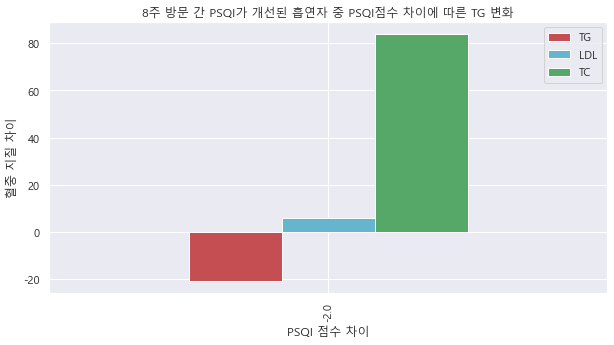

In [130]:
good_psqi_smoker_lipids_bar=good_psqi_smoker.plot.bar(color=['r','c','g'],title='8주 방문 간 PSQI가 개선된 흡연자 중 PSQI점수 차이에 따른 TG 변화')
good_psqi_smoker_lipids_bar.set_xlabel('PSQI 점수 차이')
good_psqi_smoker_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

In [112]:
#good_pd_for_nonsmoker 생성
for index, row in df_psqi_good_nonsmoker.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    TC=int(row[18])-int(row[17])
    PSQI=int(row[16])-int(row[15])
    
    #데이터 추가
    good_pd_for_nonsmoker.loc[len(good_pd_for_nonsmoker)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,TC,PSQI]
    
good_pd_for_nonsmoker

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,TC,PSQI_TOTAL
0,M0003,SMI,F,62.0,0.0,-14.0,-3.0,61.0,-11.0
1,M0007,SMI,F,56.0,-3.0,36.0,-22.0,41.0,-2.0
2,M0010,SMI,M,66.0,-3.0,-3.0,-84.0,90.0,-1.0
3,MetS_S0035,MetS,F,20.0,-7.0,-15.0,8.0,128.0,-1.0
4,MetS_S0039,MetS,F,22.0,0.0,-50.0,-6.0,98.0,-1.0
5,MetS_S0055,MetS,M,35.0,-3.0,7.0,23.0,18.0,-6.0
6,MetS_S0062,MetS,M,31.0,-16.0,72.0,-11.0,-25.0,-5.0
7,MetS_S0071,MetS,M,38.0,-4.0,44.0,-17.0,50.0,-4.0
8,MetS_S0073,MetS,M,35.0,-1.0,51.0,3.0,35.0,-2.0
9,MetS_S0076,MetS,F,25.0,-6.0,-21.0,5.0,55.0,-4.0


In [113]:
good_psqi_tg_nonsmoker = pd.DataFrame(good_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).TG.mean())
good_psqi_ldl_nonsmoker = pd.DataFrame(good_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).LDL.mean())
good_psqi_tc_nonsmoker = pd.DataFrame(good_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).TC.mean())

good_psqi_nonsmoker=pd.concat([good_psqi_tg_nonsmoker, good_psqi_ldl_nonsmoker, good_psqi_tc_nonsmoker],axis=1)
good_psqi_nonsmoker

,TG,LDL,TC
PSQI_TOTAL,,,
-11.0,-14.000000,-3.000000,61.000000
-7.0,-25.000000,-18.000000,98.000000
-6.0,-36.000000,7.000000,33.500000
-5.0,41.333333,-14.666667,13.333333
-4.0,2.285714,-1.714286,43.142857
-3.0,68.333333,-4.333333,-40.333333
-2.0,0.714286,0.428571,67.000000
-1.0,13.000000,-23.250000,56.750000


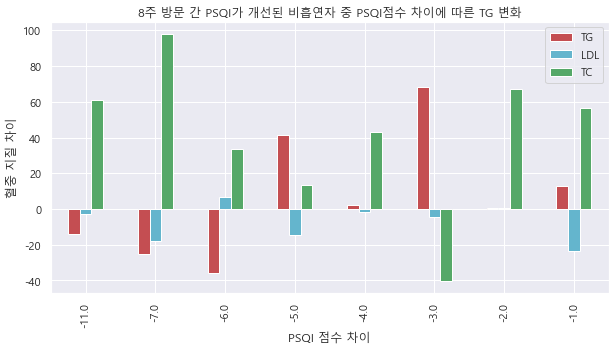

In [131]:
good_psqi_nonsmoker_lipids_bar=good_psqi_nonsmoker.plot.bar(color=['r','c','g'],title='8주 방문 간 PSQI가 개선된 비흡연자 중 PSQI점수 차이에 따른 TG 변화')
good_psqi_nonsmoker_lipids_bar.set_xlabel('PSQI 점수 차이')
good_psqi_nonsmoker_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

In [114]:
#bad_pd_for_smoker 생성
for index, row in df_psqi_bad_smoker.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    TC=int(row[18])-int(row[17])
    PSQI=int(row[16])-int(row[15])
    
    #데이터 추가
    bad_pd_for_smoker.loc[len(bad_pd_for_smoker)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,TC,PSQI]
    
bad_pd_for_smoker

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,TC,PSQI_TOTAL
0,MetS_S0044,MetS,M,28.0,-5.0,13.0,3.0,32.0,1.0
1,MetS_S0104,MetS,F,22.0,-7.0,-7.0,3.0,69.0,2.0
2,MetS_S0148,MetS,M,31.0,-11.0,-25.0,-4.0,60.0,3.0
3,MetS_S0175,MetS,M,49.0,8.0,-60.0,9.0,-16.0,4.0
4,MetS_S0214,MetS,M,35.0,-1.0,-122.0,-36.0,130.0,1.0


In [123]:
bad_psqi_tg_smoker = pd.DataFrame(bad_pd_for_smoker.groupby(['PSQI_TOTAL']).TG.mean())
bad_psqi_ldl_smoker = pd.DataFrame(bad_pd_for_smoker.groupby(['PSQI_TOTAL']).LDL.mean())
bad_psqi_tc_smoker = pd.DataFrame(bad_pd_for_smoker.groupby(['PSQI_TOTAL']).TC.mean())

bad_psqi_smoker=pd.concat([bad_psqi_tg_smoker, bad_psqi_ldl_smoker, bad_psqi_tc_smoker],axis=1)
bad_psqi_smoker

,TG,LDL,TC
PSQI_TOTAL,,,
1.0,-54.5,-16.5,81.0
2.0,-7.0,3.0,69.0
3.0,-25.0,-4.0,60.0
4.0,-60.0,9.0,-16.0


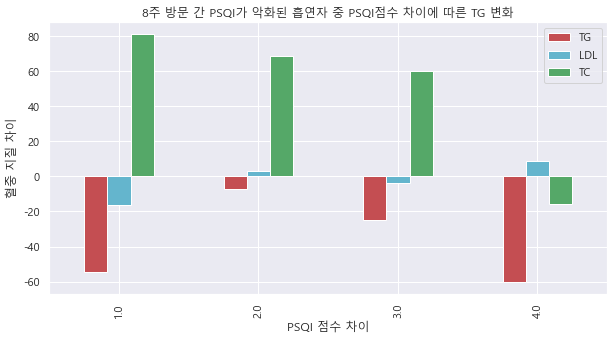

In [132]:
bad_psqi_smoker_lipids_bar=bad_psqi_smoker.plot.bar(color=['r','c','g'],title='8주 방문 간 PSQI가 악화된 흡연자 중 PSQI점수 차이에 따른 TG 변화')
bad_psqi_smoker_lipids_bar.set_xlabel('PSQI 점수 차이')
bad_psqi_smoker_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

In [125]:
#bad_pd_for_nonsmoker 생성
for index, row in df_psqi_bad_nonsmoker.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    TC=int(row[18])-int(row[17])
    PSQI=int(row[16])-int(row[15])
    
    #데이터 추가
    bad_pd_for_nonsmoker.loc[len(bad_pd_for_nonsmoker)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,TC,PSQI]
    
bad_pd_for_nonsmoker

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,TC,PSQI_TOTAL
0,S0002,SMI,M,61.0,-1.0,-5.0,0.0,-15.0,4.0
1,S0021,SMI,M,65.0,-1.0,-38.0,-7.0,-19.0,6.0
2,M0011,SMI,F,66.0,5.0,-53.0,1.0,19.0,3.0
3,MetS_S0018,MetS,M,38.0,3.0,2.0,-11.0,33.0,4.0
4,MetS_S0053,MetS,M,26.0,9.0,-33.0,-15.0,99.0,1.0
...,...,...,...,...,...,...,...,...,...
61,MetS_S0125,MetS,F,26.0,-5.0,-28.0,-35.0,93.0,3.0
62,MetS_S0155,MetS,F,62.0,-2.0,-2.0,-9.0,24.0,3.0
63,MetS_S0157,MetS,F,61.0,12.0,8.0,-15.0,16.0,3.0
64,MetS_S0207,MetS,F,61.0,1.0,-10.0,45.0,31.0,2.0


In [126]:
bad_psqi_tg_nonsmoker = pd.DataFrame(bad_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).TG.mean())
bad_psqi_ldl_nonsmoker = pd.DataFrame(bad_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).LDL.mean())
bad_psqi_tc_nonsmoker = pd.DataFrame(bad_pd_for_nonsmoker.groupby(['PSQI_TOTAL']).TC.mean())

bad_psqi_nonsmoker=pd.concat([bad_psqi_tg_nonsmoker, bad_psqi_ldl_nonsmoker, bad_psqi_tc_nonsmoker],axis=1)
bad_psqi_nonsmoker

,TG,LDL,TC
PSQI_TOTAL,,,
1.0,-33.0,-15.000000,99.000000
2.0,12.0,9.000000,49.000000
3.0,-4.0,-14.727273,43.636364
4.0,-2.5,-24.750000,67.250000
5.0,-18.0,-9.000000,10.000000
6.0,-38.0,-7.000000,-19.000000


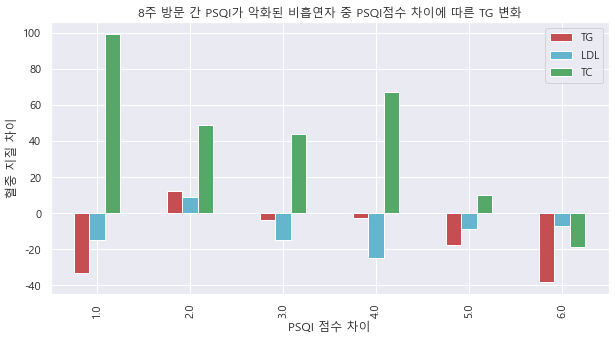

In [133]:
bad_psqi_nonsmoker_lipids_bar=bad_psqi_nonsmoker.plot.bar(color=['r','c','g'],title='8주 방문 간 PSQI가 악화된 비흡연자 중 PSQI점수 차이에 따른 TG 변화')
bad_psqi_nonsmoker_lipids_bar.set_xlabel('PSQI 점수 차이')
bad_psqi_nonsmoker_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

# 방문 때 차이로 흡연 점수 변화에 따른 혈중 지질 농도 변화 확인하기

In [93]:
#과거흡연자를 비흡연자로 바꿈

df_smoke = df_smoke.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_smoke = df_smoke.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_smoke

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,MetS_S0011,MetS,1,F,30,77,72.0,69,76.0,88,88.0,0.0,0.0,1,1,2.0,2.0,120.4,178.8
1,MetS_S0012,MetS,1,F,29,69,60.0,48,69.0,92,92.0,0.0,0.0,1,1,4.0,4.0,110.0,170.6
3,MetS_S0014,MetS,1,F,26,54,50.0,59,61.0,91,101.0,0.0,0.0,1,1,5.0,4.0,97.0,156.8
4,MetS_S0016,MetS,1,F,27,58,62.0,38,44.0,96,84.0,0.0,0.0,1,1,14.0,8.0,83.4,161.6
5,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
185,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
186,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
187,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


df_smoke = df_smoke[(df_smoke['SMOKE_1'] == 3) & (df_smoke['SMOKE_2'] == 1)]
df_smoke

#-> 8주간 SMOKE 값이 변한 사람이 없음 = 금연자, 추가흡연자 없음.

# 이전에 작업했던 SMOKE와 혈중 지질 농도 확인 part

#과거흡연자를 비흡연자로 바꿈

df_smoke = df_smoke.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_smoke = df_smoke.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_smoke

tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TG_1.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).LDL_1.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TC_1.mean())

smoke_1=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_1

tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TG_2.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).LDL_2.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TC_2.mean())

smoke_2=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_2

fig, ax = plt.subplots(1,2)

smoke_1.plot(kind='bar', ax=ax[0])    # bar(수직막대)
smoke_2.plot(kind='bar', ax=ax[1])

plt.rcParams["figure.figsize"] = (15,5)
plt.show()

# PSQI와 SMOKE 관계

In [43]:
cut_df_t

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
233,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


In [44]:
df_rel = cut_df_t.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','SMOKE_1','SMOKE_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
#df_rel.isnull().sum()
df_rel['SMOKE_1'].value_counts() #흡연자의 데이터가 너무 작다
#df_rel['SMOKE_2'].value_counts()

1    195
2     23
3     15
0      2
Name: SMOKE_1, dtype: int64

In [41]:
#잘못된 데이터 필터
df_rel = df_rel[(df_rel['SMOKE_2'] != -9) & (df_rel['SMOKE_1'] != 0) & (df_rel['SMOKE_2'] != 0)]

#과거흡연자를 흡연자로 바꿈
df_rel = df_rel.replace({'SMOKE_1': 2}, {'SMOKE_1': 3})
df_rel = df_rel.replace({'SMOKE_2': 2}, {'SMOKE_2': 3})
df_rel

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,1,1,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [47]:
#범위 필터
df_rel = df_rel[(df_rel['TG_1'] <= 300) & (df_rel['TG_2'] <= 300) & (df_rel['LDL_1'] <= 200) & (df_rel['LDL_2'] <= 200)]

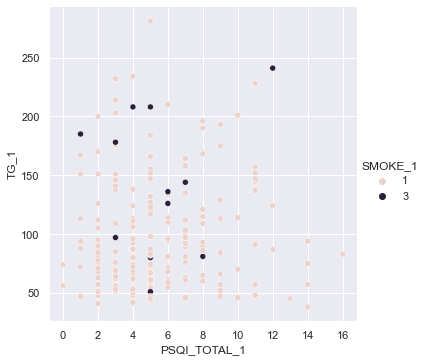

In [49]:
sns.relplot(x='PSQI_TOTAL_1',y='TG_1',hue='SMOKE_1',sizes=(15,200),data=df_rel)

In [50]:
df_rel['SMOKE_1'].value_counts()

1    210
3     14
Name: SMOKE_1, dtype: int64

In [51]:
df_rel['SMOKE_2'].value_counts()

1    209
3     15
Name: SMOKE_2, dtype: int64